# Итоговый проект курса "Библиотеки Python для Data Science"

### Подключение библиотек и скриптов

In [433]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import warnings
from matplotlib import style

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score as r2
from sklearn.model_selection import KFold, GridSearchCV
from datetime import datetime

style.use('fivethirtyeight')
%matplotlib inline
warnings.filterwarnings('ignore')

### Загрузка данных

In [637]:
TRAIN_DATASET_PATH = 'train.csv'
TEST_DATASET_PATH = 'test.csv'

test_df = pd.read_csv(TEST_DATASET_PATH)
train_df = pd.read_csv(TRAIN_DATASET_PATH)

### Описание датасета

* **Id** - идентификационный номер квартиры
* **DistrictId** - идентификационный номер района
* **Rooms** - количество комнат
* **Square** - площадь
* **LifeSquare** - жилая площадь
* **KitchenSquare** - площадь кухни
* **Floor** - этаж
* **HouseFloor** - количество этажей в доме
* **HouseYear** - год постройки дома
* **Ecology_1, Ecology_2, Ecology_3** - экологические показатели местности
* **Social_1, Social_2, Social_3** - социальные показатели местности
* **Healthcare_1, Helthcare_2** - показатели местности, связанные с охраной здоровья
* **Shops_1, Shops_2** - показатели, связанные с наличием магазинов, торговых центров
* **Price** - цена квартиры

In [408]:
train_df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,11809,27,3.0,115.027311,NaN,10.0,4,10.0,2014,0.075424,B,B,11,3097,0,NaN,0,0,B,305018.871089
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,B,B,30,6207,1,1183.0,1,0,B,177734.553407
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,B,B,33,5261,0,240.0,3,1,B,282078.720850
3,2352,1,1.0,40.409907,NaN,1.0,10,22.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,168106.007630
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,B,B,33,8667,2,NaN,0,6,B,343995.102962


In [396]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               10000 non-null  object 
 1   DistrictId       10000 non-null  object 
 2   Rooms            10000 non-null  int64  
 3   Square           10000 non-null  float64
 4   LifeSquare       10000 non-null  float64
 5   KitchenSquare    10000 non-null  float64
 6   Floor            10000 non-null  int64  
 7   HouseFloor       10000 non-null  int64  
 8   HouseYear        10000 non-null  int64  
 9   Ecology_1        10000 non-null  float64
 10  Ecology_2        10000 non-null  int64  
 11  Ecology_3        10000 non-null  int64  
 12  Social_1         10000 non-null  int64  
 13  Social_2         10000 non-null  int64  
 14  Social_3         10000 non-null  int64  
 15  Healthcare_1     10000 non-null  float64
 16  Helthcare_2      10000 non-null  int64  
 17  Shops_1      

In [5]:
test_df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,4567,44,1.0,36.847630,19.094182,5.0,5,9.0,1970,0.036122,B,B,24,4378,0,1036.0,1,1,B
1,5925,62,1.0,42.493907,42.568133,10.0,7,17.0,2017,0.072158,B,B,2,629,1,NaN,0,0,A
2,960,27,2.0,59.463678,NaN,9.0,19,19.0,1977,0.211401,B,B,9,1892,0,NaN,0,1,B
3,3848,23,3.0,49.646030,33.893825,6.0,2,2.0,1965,0.014073,B,B,2,475,0,NaN,0,0,B
4,746,74,1.0,53.837056,NaN,1.0,8,17.0,1977,0.309479,B,B,35,7715,4,990.0,0,6,B


In [6]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             5000 non-null   int64  
 1   DistrictId     5000 non-null   int64  
 2   Rooms          5000 non-null   float64
 3   Square         5000 non-null   float64
 4   LifeSquare     3959 non-null   float64
 5   KitchenSquare  5000 non-null   float64
 6   Floor          5000 non-null   int64  
 7   HouseFloor     5000 non-null   float64
 8   HouseYear      5000 non-null   int64  
 9   Ecology_1      5000 non-null   float64
 10  Ecology_2      5000 non-null   object 
 11  Ecology_3      5000 non-null   object 
 12  Social_1       5000 non-null   int64  
 13  Social_2       5000 non-null   int64  
 14  Social_3       5000 non-null   int64  
 15  Healthcare_1   2623 non-null   float64
 16  Helthcare_2    5000 non-null   int64  
 17  Shops_1        5000 non-null   int64  
 18  Shops_2 

In [7]:
print(f'Строк в трейне: {train_df.shape[0]}, Столбцов в трейне: {train_df.shape[1]}')
print(f'Строк в тесте: {test_df.shape[0]}, Столбцов в тесте: {test_df.shape[1]}')

Строк в трейне: 10000, Столбцов в трейне: 20
Строк в тесте: 5000, Столбцов в тесте: 19


### Приведение типов

In [435]:
train_df['Id'] = train_df['Id'].astype(str)
train_df['Rooms'] = train_df['Rooms'].astype('int64')
train_df['HouseFloor'] = train_df['HouseFloor'].astype('int64')

test_df['Id'] = test_df['Id'].astype(str)
test_df['Rooms'] = test_df['Rooms'].astype('int64')
test_df['HouseFloor'] = test_df['HouseFloor'].astype('int64')

### EDA

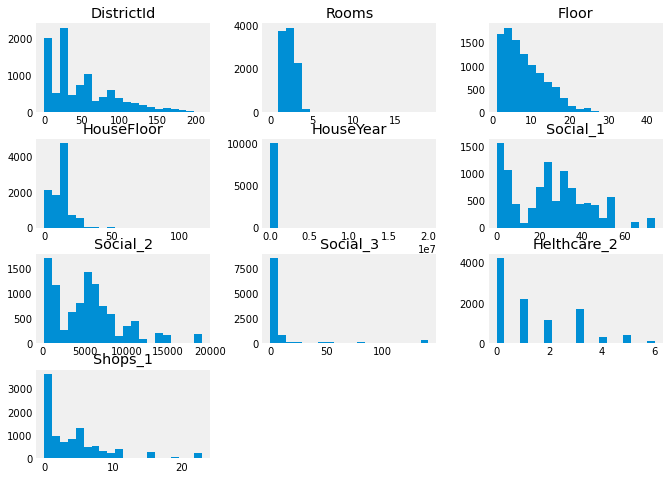

In [272]:
numerical = train_df.select_dtypes(include ='int64')

pd.DataFrame(numerical).hist(figsize = (10, 8), bins = 20, grid = False)
sns.despine(left = True, bottom = True)

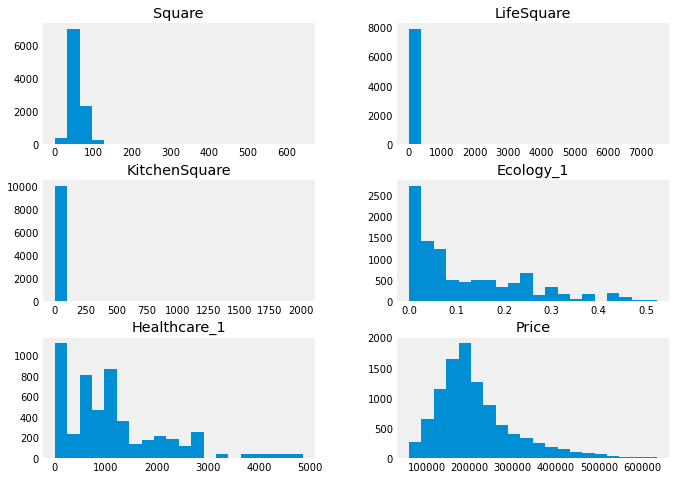

In [273]:
numerical = train_df.select_dtypes(include = 'float64')

pd.DataFrame(numerical).hist(figsize = (10, 8), bins = 20, grid = False)
sns.despine(left = True, bottom = True)

In [198]:
train_df.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,4859.01902,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


In [197]:
test_df.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1
count,5000.000000,5000.000000,5000.000000,5000.000000,3959.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,2623.000000,5000.00000,5000.000000
mean,8412.595400,51.279200,1.910000,56.449500,36.158810,5.976800,8.632000,12.601000,1984.392600,0.119874,24.933800,5406.900000,8.262600,1146.657263,1.31940,4.242800
std,4832.674037,44.179466,0.838594,19.092787,17.825287,9.950018,5.483228,6.789213,18.573149,0.120070,17.532202,4026.614773,23.863762,1044.744231,1.47994,4.777365
min,1.000000,0.000000,0.000000,1.378543,0.333490,0.000000,1.000000,0.000000,1908.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.00000,0.000000
25%,4221.750000,21.000000,1.000000,41.906231,23.092026,1.000000,4.000000,9.000000,1973.000000,0.019509,6.000000,1564.000000,0.000000,325.000000,0.00000,1.000000
50%,8320.500000,37.000000,2.000000,52.921340,32.925087,6.000000,7.000000,12.000000,1977.000000,0.072158,25.000000,5285.000000,2.000000,900.000000,1.00000,3.000000
75%,12598.250000,77.000000,2.000000,66.285129,45.174091,9.000000,12.000000,17.000000,2000.000000,0.195781,36.000000,7287.000000,5.000000,1548.000000,2.00000,6.000000
max,16795.000000,212.000000,17.000000,223.453689,303.071094,620.000000,78.000000,99.000000,2020.000000,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.00000,23.000000


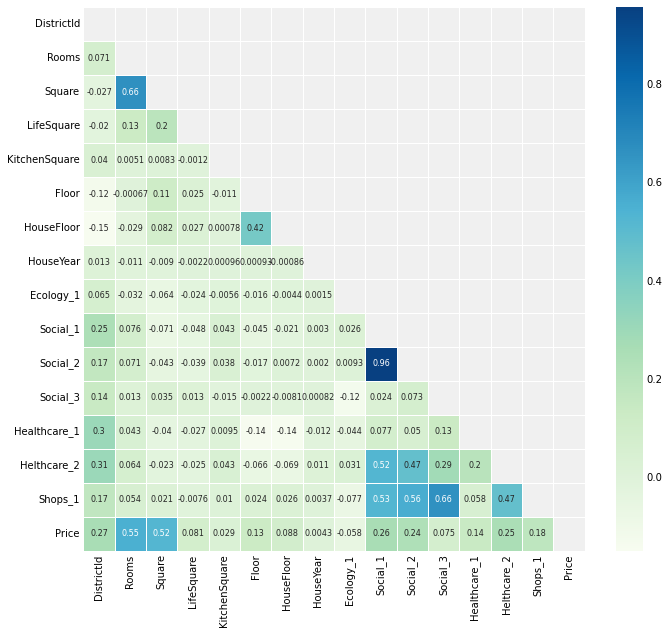

In [274]:
# Взаимосвязь признаков
correlation = pd.DataFrame(train_df.select_dtypes(include = ['int64', 'float64'])).corr()
plt.figure(figsize = (10, 10))
mask = np.zeros_like(correlation, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(correlation, mask = mask, annot = True, linewidths = .5, annot_kws = {"size":8}, cmap='GnBu')
plt.show()

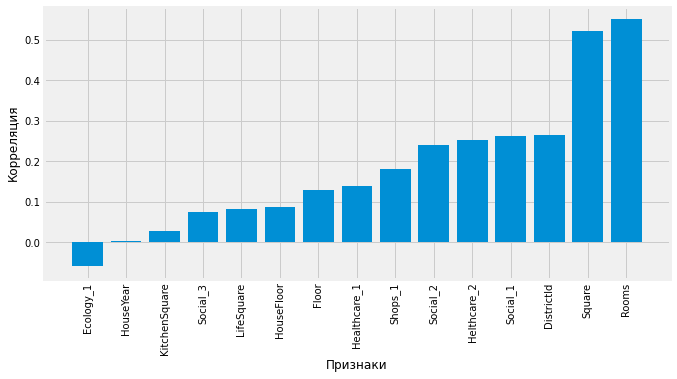

In [275]:
# Влияние признаков на цену.
correlation = train_df.corrwith(train_df['Price']).sort_values()
correlation.drop('Price', inplace=True)

plt.figure(figsize = (10, 5))
plt.bar(correlation.index, correlation)
plt.xticks(rotation='90')
plt.xlabel('Признаки')
plt.ylabel('Корреляция')
plt.show()

In [353]:
# Категориальные признаки
train_df.select_dtypes(include='object').columns.tolist()

['Id', 'Ecology_2', 'Ecology_3', 'Shops_2']

In [354]:
train_df['Ecology_2'].value_counts()

B    9903
A      97
Name: Ecology_2, dtype: int64

In [278]:
train_df['Ecology_3'].value_counts()

B    9725
A     275
Name: Ecology_3, dtype: int64

In [279]:
train_df['Shops_2'].value_counts()

B    9175
A     825
Name: Shops_2, dtype: int64

# Подготовка данных

In [638]:
# Замена на бинарные значения
objects = ['Ecology_2', 'Ecology_3', 'Shops_2']

train_df[objects] = train_df[objects].replace({'A':0, 'B':1})
test_df[objects] = test_df[objects].replace({'A':0, 'B':1})

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     7887 non-null   float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  int64  
 11  Ecology_3      10000 non-null  int64  
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   5202 non-null   float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

In [639]:
# Пропущенные значения
train_df.isna().sum()[train_df.isna().sum() != 0]

LifeSquare      2113
Healthcare_1    4798
dtype: int64

In [640]:
test_df.isna().sum()[test_df.isna().sum() != 0]

LifeSquare      1041
Healthcare_1    2377
dtype: int64

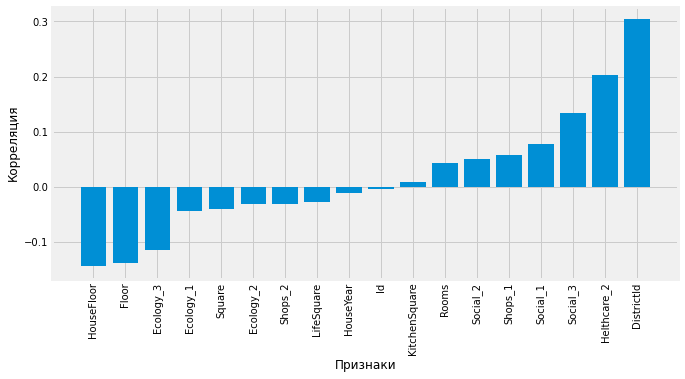

In [641]:
# На Healthcare_1 больше всего влияние оказывает DistrictID
correlation = train_df.corrwith(train_df['Healthcare_1']).sort_values()
correlation.drop(['Healthcare_1','Price',], inplace=True)

plt.figure(figsize = (10, 5))
plt.bar(correlation.index, correlation)
plt.xticks(rotation='90')
plt.xlabel('Признаки')
plt.ylabel('Корреляция')
plt.show()

In [642]:
# Заменим пропущенные значения Healthcare_1 на средние значения по району

train_df.loc[train_df['Healthcare_1'].isna(), 'Healthcare_1'] =\
    train_df.groupby(['DistrictId'])['Healthcare_1'].transform(lambda x: x.mean())
test_df.loc[test_df['Healthcare_1'].isna(), 'Healthcare_1'] =\
    train_df.groupby(['DistrictId'])['Healthcare_1'].transform(lambda x: x.mean())

In [597]:
(train_df['Healthcare_1'].isna()).sum()

1884

In [598]:
(test_df['Healthcare_1'].isna()).sum()

416

In [643]:
# Оставшиеся пропуски заменим медианой
train_df['Healthcare_1'].fillna(train_df['Healthcare_1'].median(), inplace=True)
test_df['Healthcare_1'].fillna(train_df['Healthcare_1'].median(), inplace=True)

In [644]:
train_df['DistrictId'] = train_df['DistrictId'].astype(str)
test_df['DistrictId'] = test_df['DistrictId'].astype(str)

In [26]:
# Обработаем выбросы площадей кухни, общей площади и жилого пространства.

In [645]:
# Заменим медианой значения выше 0.975 квантиля, меньше либо равное 3, за исключением значения 0.
train_df.loc[(train_df['KitchenSquare'] > train_df['KitchenSquare'].quantile(.975)) | \
    (train_df['KitchenSquare'] > train_df['Square']) | (train_df['KitchenSquare'] <= 3) \
             & (train_df['KitchenSquare'] > 0), 'KitchenSquare'] = train_df['KitchenSquare'].median()
test_df.loc[(test_df['KitchenSquare'] > test_df['KitchenSquare'].quantile(.975)) | \
    (test_df['KitchenSquare'] > test_df['Square']) | (test_df['KitchenSquare'] <= 3) \
             & (test_df['KitchenSquare'] > 0), 'KitchenSquare'] = train_df['KitchenSquare'].median()

In [646]:
# Заменим значения меньше 20 на 20 и больше 200 на 200.
train_df.loc[train_df['Square'] <= 20, 'Square'] = 20
train_df.loc[train_df['Square'] >= 200, 'Square'] = 200
test_df.loc[test_df['Square'] <= 20, 'Square'] = 20
test_df.loc[test_df['Square'] >= 200, 'Square'] = 200

In [647]:
# Заменим пропуски значениями Square - KitchenSquare - 5 (площадь туалетов, ванных и коридоров)
train_df.loc[train_df['LifeSquare'].isna(), 'LifeSquare'] = train_df['Square'] - train_df['KitchenSquare'] -5
test_df.loc[test_df['LifeSquare'].isna(), 'LifeSquare'] = test_df['Square'] - test_df['KitchenSquare'] -5

In [604]:
(train_df['LifeSquare'] > train_df['Square']).sum()

476

In [648]:
# Заменим такие значения Square - KitchenSquare - 5 (площадь туалетов, ванных и коридоров)
train_df.loc[(train_df['LifeSquare'] > train_df['Square']), 'LifeSquare'] = train_df['Square'] - train_df['KitchenSquare'] -5
test_df.loc[(test_df['LifeSquare'] > test_df['Square']), 'LifeSquare'] = test_df['Square'] - test_df['KitchenSquare'] -5

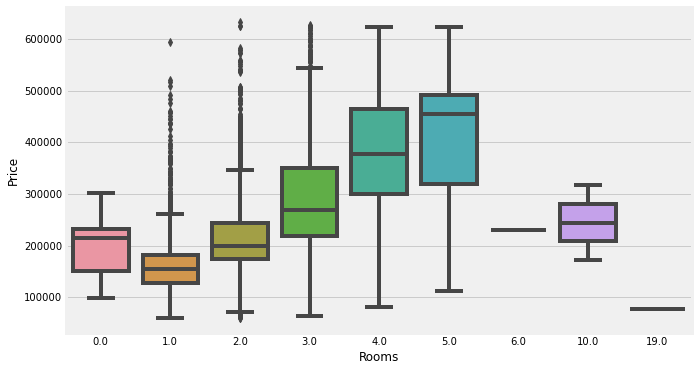

In [649]:
# Обработка выбросов в количестве комнат

plt.figure(figsize = (10, 6))
sns.boxplot(train_df['Rooms'], train_df['Price'])
plt.xlabel('Rooms')
plt.ylabel('Price')
plt.show()

In [650]:
test_df['Rooms'].value_counts()

2.0     2030
1.0     1769
3.0     1099
4.0       90
5.0        7
6.0        2
0.0        2
17.0       1
Name: Rooms, dtype: int64

In [651]:
# Заменим модой количество комнат равное 0 или больше 6.
train_df.loc[(train_df['Rooms'] > 6) | (train_df['Rooms'] == 0), 'Rooms'] = train_df['Rooms'].mode()[0]
test_df.loc[(test_df['Rooms'] > 6) | (test_df['Rooms'] == 0), 'Rooms'] = train_df['Rooms'].mode()[0]

In [652]:
train_df['Rooms'].value_counts()

2.0    3891
1.0    3705
3.0    2235
4.0     150
5.0      18
6.0       1
Name: Rooms, dtype: int64

In [160]:
# Обработаем выбросы по этажам 

In [653]:
# Заменим медианой этажность равную 0 и выше 90
train_df.loc[(train_df['HouseFloor'] == 0) | \
    (train_df['HouseFloor'] > 90), 'HouseFloor'] = train_df['HouseFloor'].median()
test_df.loc[(test_df['HouseFloor'] == 0) | \
    (test_df['HouseFloor'] > 90), 'HouseFloor'] = train_df['HouseFloor'].median()

In [654]:
(train_df['Floor'] > train_df['HouseFloor']).sum()

1610

In [655]:
# Поменяем местами этаж и этажность
train_df['Floor_temp'] = train_df['Floor']
test_df['Floor_temp'] = test_df['Floor']

train_df.loc[(train_df['Floor'] > train_df['HouseFloor']), 'Floor'] = \
    train_df.loc[(train_df['Floor'] > train_df['HouseFloor']), 'HouseFloor']
train_df.loc[(train_df['Floor'] > train_df['HouseFloor']), 'HouseFloor'] = \
    train_df.loc[(train_df['Floor'] > train_df['HouseFloor']), 'Floor_temp']
test_df.loc[(test_df['Floor'] > test_df['HouseFloor']), 'Floor'] = \
    test_df.loc[(test_df['Floor'] > test_df['HouseFloor']), 'HouseFloor']
test_df.loc[(test_df['Floor'] > test_df['HouseFloor']), 'HouseFloor'] = \
    test_df.loc[(test_df['Floor'] > test_df['HouseFloor']), 'Floor_temp']

train_df.drop('Floor_temp', axis=1, inplace=True)
test_df.drop('Floor_temp', axis=1, inplace=True)

In [656]:
# Обработаем выбросы HouseYear
train_df['HouseYear'].unique()

array([    2014,     1966,     1988,     1977,     1972,     1968,
           1986,     2008,     1978,     2012,     1969,     2003,
           1981,     1962,     2015,     2018,     1976,     1985,
           1960,     2019,     1974,     1956,     1963,     1961,
           1979,     2006,     1953,     1973,     1982,     1965,
           2007,     2013,     1983,     1995,     1971,     2017,
           1964,     1991,     1990,     2016,     2011,     1984,
           1993,     1997,     2009,     1975,     2010,     1987,
           1935,     1970,     1967,     1989,     1959,     1996,
           2005,     1994,     1958,     2004,     1998,     1992,
           1980,     2000,     2002,     1954,     2001,     1999,
           1917,     1955,     1957,     1934,     2020,     1932,
           1942,     1940,     1937,     1941,     1939,     1931,
           1951,     1912,     1918,     1952,     1919,     1936,
           1930,     1938,     1950,     1933,     1929,     1

In [657]:
test_df['HouseYear'].unique()

array([1970, 2017, 1977, 1965, 2011, 2014, 1974, 1981, 2009, 2004, 2007,
       1990, 2015, 1979, 1972, 2020, 1964, 1997, 1980, 2016, 1988, 1968,
       1994, 2013, 1967, 1960, 2018, 1949, 2000, 2002, 1982, 1963, 1959,
       1989, 1962, 1985, 1966, 1958, 1999, 2008, 2005, 2001, 1995, 1978,
       1992, 1986, 2006, 2003, 1961, 1969, 2010, 1971, 1996, 1987, 1975,
       2019, 1973, 1998, 1957, 1993, 1976, 1956, 2012, 1983, 1984, 1932,
       1941, 1928, 1935, 1931, 1926, 1991, 1914, 1952, 1930, 1953, 1917,
       1938, 1933, 1948, 1929, 1943, 1927, 1955, 1934, 1908, 1954, 1918,
       1950, 1920, 1910, 1909, 1911, 1937, 1939, 1940, 1912], dtype=int64)

In [658]:
set(train_df['HouseYear'].unique()) - set(test_df['HouseYear'].unique())

{1916, 1919, 1936, 1942, 1947, 1951, 4968, 20052011}

In [659]:
set(test_df['HouseYear'].unique()) - set(train_df['HouseYear'].unique())

{1908, 1909, 1911, 1920, 1926, 1927, 1943, 1949}

In [660]:
train_df.loc[train_df["HouseYear"] == 4968, 'HouseYear'] = 1968
train_df.loc[train_df["HouseYear"] == 20052011, 'HouseYear'] = 2005

### Построение новых признаков 

In [661]:
# DistrictSize
district_size = train_df['DistrictId'].value_counts().reset_index()\
                    .rename(columns={'index':'DistrictId', 'DistrictId':'DistrictSize'})
district_size_test = test_df['DistrictId'].value_counts().reset_index()\
                    .rename(columns={'index':'DistrictId', 'DistrictId':'DistrictSize'})

district_size.head()

,DistrictId,DistrictSize
0,27,851
1,1,652
2,23,565
3,6,511
4,9,294


In [662]:
train_df = train_df.merge(district_size, on='DistrictId', how='left')
test_df = test_df.merge(district_size_test, on='DistrictId', how='left')
train_df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,DistrictSize
0,11809,27,3.0,115.027311,100.027311,10.0,4.0,10.0,2014,0.075424,...,1,11,3097,0,770.00000,0,0,1,305018.871089,851
1,3013,22,1.0,39.832524,23.169223,8.0,7.0,8.0,1966,0.118537,...,1,30,6207,1,1183.00000,1,0,1,177734.553407,78
2,8215,1,3.0,78.342215,47.671972,10.0,2.0,17.0,1988,0.025609,...,1,33,5261,0,240.00000,3,1,1,282078.720850,652
3,2352,1,1.0,40.409907,29.409907,6.0,10.0,22.0,1977,0.007122,...,1,1,264,0,228.77193,0,1,1,168106.007630,652
4,13866,94,2.0,64.285067,38.562517,9.0,16.0,16.0,1972,0.282798,...,1,33,8667,2,770.00000,0,6,1,343995.102962,89


In [663]:
# IsDistrictLarge
(train_df['DistrictSize'] > 100).value_counts()

True     5069
False    4931
Name: DistrictSize, dtype: int64

In [664]:
train_df['IsDistrictLarge'] = (train_df['DistrictSize'] > 100).astype(int)
test_df['IsDistrictLarge'] = (test_df['DistrictSize'] > 100).astype(int)

In [563]:
train_df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,DistrictSize,IsDistrictLarge
0,11809,27,3.0,115.027311,100.027311,10.0,4.0,10.0,2014,0.075424,...,11,3097,0,770.00000,0,0,1,305018.871089,851,1
1,3013,22,1.0,39.832524,23.169223,8.0,7.0,8.0,1966,0.118537,...,30,6207,1,1183.00000,1,0,1,177734.553407,78,0
2,8215,1,3.0,78.342215,47.671972,10.0,2.0,17.0,1988,0.025609,...,33,5261,0,240.00000,3,1,1,282078.720850,652,1
3,2352,1,1.0,40.409907,29.409907,6.0,10.0,22.0,1977,0.007122,...,1,264,0,228.77193,0,1,1,168106.007630,652,1
4,13866,94,2.0,64.285067,38.562517,9.0,16.0,16.0,1972,0.282798,...,33,8667,2,770.00000,0,6,1,343995.102962,89,0


In [311]:
# PriceRoomDistrict
train_df['PriceRoom'] = train_df['Price'] / train_df['Rooms']

In [312]:
price_room_district = train_df.groupby(['DistrictId'], as_index=False)\
                        .agg({'PriceRoom':'median'})\
                        .rename(columns={'PriceRoom':'PriceRoomDistrict'})

price_room_district

,DistrictId,PriceRoomDistrict
0,0,108490.121043
1,1,106080.898140
2,10,113675.124241
3,100,146060.096904
4,101,104499.155423
...,...,...
200,95,156039.000845
201,96,127496.377095
202,97,168870.709860
203,98,112989.528052


In [313]:
train_df = train_df.merge(price_room_district, on=['DistrictId'], how='left').set_index(train_df.index)
test_df = test_df.merge(price_room_district, on=['DistrictId'], how='left').set_index(test_df.index)

In [314]:
train_df = train_df.drop(['PriceRoom'], axis=1)

In [315]:
train_df['RoomSquare'] = train_df['Square'] / train_df['Rooms']
test_df['RoomSquare'] = test_df['Square'] / test_df['Rooms']

In [316]:
test_df.loc[test_df['PriceRoomDistrict'].isna(), 'PriceRoomDistrict'] = test_df['PriceRoomDistrict'].median()

In [317]:
# Floor_cat
train_df.loc[train_df['Floor'] <= 5, 'Floor_cat'] = 1  
train_df.loc[(train_df['Floor'] > 5) & (train_df['Floor'] <= 17), 'Floor_cat'] = 2
train_df.loc[train_df['Floor'] > 17, 'Floor_cat'] = 3

test_df.loc[test_df['Floor'] <= 5, 'Floor_cat'] = 1  
test_df.loc[(test_df['Floor'] > 5) & (test_df['Floor'] <= 17), 'Floor_cat'] = 2
test_df.loc[test_df['Floor'] > 17, 'Floor_cat'] = 3

train_df['Floor_cat'].value_counts()

2.0    5487
1.0    4125
3.0     388
Name: Floor_cat, dtype: int64

In [318]:
labels = [1, 2, 3]
train_df['Floor_cat_qcut'] = pd.qcut(train_df['Floor'], q = 3, labels = labels)
test_df['Floor_cat_qcut'] = pd.qcut(test_df['Floor'], q = 3, labels = labels)
train_df['Floor_cat_qcut'].value_counts()

1    4125
3    3244
2    2631
Name: Floor_cat_qcut, dtype: int64

In [319]:
# HouseFloor_cat
train_df.loc[train_df['HouseFloor'] <= 5, 'HouseFloor_cat'] = 1  
train_df.loc[(train_df['HouseFloor'] > 5) & (train_df['HouseFloor'] <= 17), 'HouseFloor_cat'] = 2
train_df.loc[train_df['HouseFloor'] > 17, 'HouseFloor_cat'] = 3

test_df.loc[test_df['HouseFloor'] <= 5, 'HouseFloor_cat'] = 1  
test_df.loc[(test_df['HouseFloor'] > 5) & (test_df['HouseFloor'] <= 17), 'HouseFloor_cat'] = 2
test_df.loc[test_df['HouseFloor'] > 17, 'HouseFloor_cat'] = 3

train_df['HouseFloor_cat'].value_counts()

2.0    6838
1.0    1837
3.0    1325
Name: HouseFloor_cat, dtype: int64

In [320]:
train_df[['Floor_cat', 'HouseFloor_cat']] = train_df[['Floor_cat', 'HouseFloor_cat']].astype(int)
test_df[['Floor_cat', 'HouseFloor_cat']] = test_df[['Floor_cat', 'HouseFloor_cat']].astype(int)

In [564]:
class FeatureGenetator():
    """Генерация новых фич"""
    
    def __init__(self):
        self.DistrictId_counts = None
        self.binary_to_numbers = None
        self.med_price_by_district = None
        self.med_price_by_floor_year = None
        self.house_year_max = None
        self.floor_max = None
        self.house_year_min = None
        self.floor_min = None
        self.district_size = None
        
        
    def fit(self, X, y=None):
        
        X = X.copy()
        
                
        # Target encoding
        ## District, Rooms
        df = X.copy()
        
        if y is not None:
            df['Price'] = y.values
            self.med_price_by_district = df.groupby(['DistrictId', 'Rooms'], as_index=False).agg({'Price':'median'}).rename(columns={'Price':'MedPriceByDistrict'})
            self.med_price_by_district_median = self.med_price_by_district['MedPriceByDistrict'].median()
            
        ## floor, year
        if y is not None:
            self.floor_max = df['Floor'].max()
            self.floor_min = df['Floor'].min()
            self.house_year_max = df['HouseYear'].max()
            self.house_year_min = df['HouseYear'].min()
            df['Price'] = y.values
            df = self.floor_to_cat(df)
            df = self.year_to_cat(df)
            self.med_price_by_floor_year = df.groupby(['year_cat', 'floor_cat'], as_index=False).agg({'Price':'median'}).rename(columns={'Price':'MedPriceByFloorYear'})
            self.med_price_by_floor_year_median = self.med_price_by_floor_year['MedPriceByFloorYear'].median()
        

        
    def transform(self, X):
        
        
        # More categorical features
        X = self.floor_to_cat(X)  # + столбец floor_cat
        X = self.year_to_cat(X)   # + столбец year_cat
        
        # Target encoding
        if self.med_price_by_district is not None:
            X = X.merge(self.med_price_by_district, on=['DistrictId', 'Rooms'], how='left')
            X['MedPriceByDistrict'].fillna(self.med_price_by_district_median, inplace=True)
            
        if self.med_price_by_floor_year is not None:
            X = X.merge(self.med_price_by_floor_year, on=['year_cat', 'floor_cat'], how='left')
            X['MedPriceByFloorYear'].fillna(self.med_price_by_floor_year_median, inplace=True)
        
        return X
    
    def floor_to_cat(self, X):
        bins = [self.floor_min, 3, 5, 9, 15, self.floor_max]
        X['floor_cat'] = pd.cut(X['Floor'], bins=bins, labels=False)

        X['floor_cat'].fillna(-1, inplace=True)
        return X
     
    def year_to_cat(self, X):
        bins = [self.house_year_min, 1941, 1945, 1980, 2000, 2010, self.house_year_max]
        X['year_cat'] = pd.cut(X['HouseYear'], bins=bins, labels=False)

        X['year_cat'].fillna(-1, inplace=True)
        return X

# Разбиение на train и test 

In [665]:
target_names = ['Price']

In [666]:
X = train_df.drop(columns=target_names)
y = train_df[target_names]

In [623]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.33, shuffle=True, random_state=21)

# Построение модели

In [624]:
features_gen = FeatureGenetator()
features_gen.fit(X_train, y_train)

X_train = features_gen.transform(X_train)
X_valid = features_gen.transform(X_valid)
test_df = features_gen.transform(test_df)

In [625]:
X_train.isna().sum().sum(), X_valid.isna().sum().sum(), test_df.isna().sum().sum()

(0, 0, 0)

In [480]:
rf_model_best = RandomForestRegressor(max_depth=15,
                                    max_features=5,
                                    random_state=56)
rf_model_best.fit(X_train, y_train)

RandomForestRegressor(max_depth=15, max_features=5, random_state=56)

In [481]:
y_train_preds = rf_model_best.predict(X_train)
y_valid_preds = rf_model_best.predict(X_valid)

print("Train R2:\t" + str(round(r2(y_train, y_train_preds), 3)))
print("Valid R2:\t" + str(round(r2(y_valid, y_valid_preds), 3)))

Train R2:	0.949
Valid R2:	0.721


# Прогнозирование на тестовом датасете 

In [483]:
predictions = rf_model_best.predict(test_df)
predictions

array([159236.24474113, 135120.72616589, 156652.73773714, ...,
       147616.51175122, 188860.65677187, 253795.47443015])

In [672]:
preds = pd.DataFrame()
preds['Id'] = test_df['Id']
preds['Price'] = predictions
preds.head()

,Id,Price
0,4567,155941.852857
1,5925,126922.148770
2,960,153862.843599
3,3848,115325.019569
4,746,164860.118662


In [673]:
preds.to_csv('predictions_01.csv', index=False)

# Light auto ML

In [347]:
!pip install lightautoml

  Created wheel for pymeeus: filename=PyMeeus-0.5.11-py3-none-any.whl size=730984 sha256=090ec10acc5266f872e3ec9b16bfcecacbdda87e192d3f1080cffc6e14f1d541
  Stored in directory: c:\users\cluster\appdata\local\pip\cache\wheels\33\3d\82\4579e9cca41ff991140b2e050bc6df3a38292f26e4fa06b15d
  Created wheel for json2html: filename=json2html-1.3.0-py3-none-any.whl size=7609 sha256=f990a27047ac6899a62764697b02e212f5f5ac112224531264c8d7a95a536d63
  Stored in directory: c:\users\cluster\appdata\local\pip\cache\wheels\b9\56\a2\f610a5e8a635d74d27c9971d6099b2521d2155169ff2d99b89
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11136 sha256=445fa538ba8db56c906f7f859762ebfcef06cf960ce5d79997c422ffbbcd59e2
  Stored in directory: c:\users\cluster\appdata\local\pip\cache\wheels\0c\09\9e\49e21a6840ef7955b06d47394afef0058f0378c0914e48b8b8
Successfully built pymeeus json2html pyperclip


In [566]:
from lightautoml.automl.presets.tabular_presets import TabularAutoML, TabularUtilizedAutoML
from lightautoml.tasks import Task
from lightautoml.tasks.common_metric import mean_quantile_error, rmsle, r2_score

In [585]:
TASK = Task('reg', loss='mse', metric=rmsle, greater_is_better=False)
TIMEOUT = 300000
N_THREADS = 4
N_FOLDS = 5
RANDOM_STATE = 42
TARGET_NAME = 'Price'
TEST_SIZE=0.2

In [586]:
roles = {'target': TARGET_NAME, 'drop': ['Id']}

In [587]:
automl_model = TabularAutoML(task=TASK,
                            timeout=TIMEOUT,
                            cpu_limit = N_THREADS,
                            gpu_ids='all',
                            reader_params = {'n_jobs': N_THREADS, 'cv': N_FOLDS, 'random_state': RANDOM_STATE},
                            general_params={'use_algos': [ ['lgb_tuned', 'cb_tuned', 'cb'], ['lgb_tuned', 'cb'] ]},
                            tuning_params={'max_tuning_iter': 10},
                      )

In [570]:
features_gen = FeatureGenetator()
features_gen.fit(train_df, train_df[target_names])

X_train = features_gen.transform(train_df)
test_df = features_gen.transform(test_df)

In [588]:
oof_pred = automl_model.fit_predict(train_df, roles = roles)

In [589]:
test_df['Price'] = automl_model.predict(test_df).data

In [573]:
test_df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Helthcare_2,Shops_1,Shops_2,DistrictSize,IsDistrictLarge,floor_cat,year_cat,MedPriceByDistrict,MedPriceByFloorYear,Price
0,4567,44,1.0,36.847630,19.094182,5.0,5.0,9.0,1970,0.036122,...,1,1,1,46,0,1.0,2.0,171145.169069,186453.111605,164199.46875
1,5925,62,1.0,42.493907,27.493907,10.0,7.0,17.0,2017,0.072158,...,0,0,0,122,1,2.0,5.0,129107.218932,172652.431537,133870.84375
2,960,27,2.0,59.463678,45.463678,9.0,19.0,19.0,1977,0.211401,...,0,1,1,391,1,4.0,2.0,165700.355193,175503.767602,155022.78125
3,3848,23,3.0,49.646030,33.893825,6.0,2.0,2.0,1965,0.014073,...,0,0,1,264,1,0.0,2.0,166687.735824,179646.198587,137355.81250
4,746,74,1.0,53.837056,42.837056,6.0,8.0,17.0,1977,0.309479,...,0,6,1,61,0,2.0,2.0,165071.825722,192213.977261,186923.09375


In [590]:
test_df.to_csv('submission_LAMA_01.csv', columns=['Id', 'Price'], index=False)